In [1]:
import warnings
warnings.filterwarnings("ignore")

### Task 1: Anscombe's Quartet

In [2]:
import yellowbrick as yb
import matplotlib.pyplot as plt

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

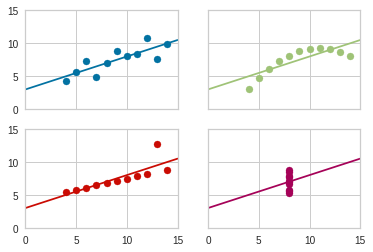

In [3]:
yb.anscombe()
plt.show()

### Task 2: Feature Analysis - RadViz

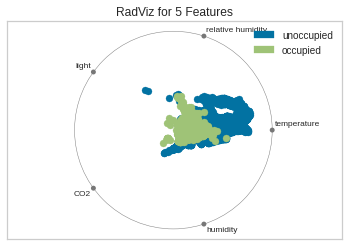

In [4]:
from yellowbrick.features.radviz import radviz
from yellowbrick.datasets import load_occupancy

#Load the classification dataset
X, y = load_occupancy()

# Specify the target classes
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
radviz(
    X, y, 
    classes = classes
)
plt.show()

### Task 3: Feature Analysis - Parallel Coordinates Plot

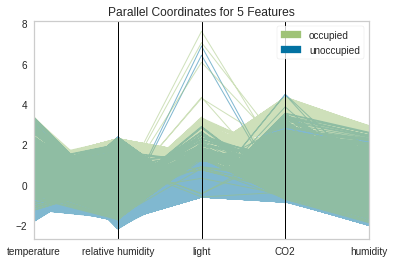

In [5]:
from yellowbrick.features.pcoords import parallel_coordinates
from yellowbrick.datasets import load_occupancy

# Load the classification data set
X, y = load_occupancy()

# Specify the features of interest and the classes of the target
features = [
    "temperature", "relative humidity", "light", "CO2", "humidity"
]
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
parallel_coordinates(
    X, y, 
    classes = classes, 
    features = features,
    normalize = 'standard', 
    sample = 0.5, 
    shuffle = True,
    fast = True
)
plt.show()

### Task 4: Feature Analysis - Rank Features

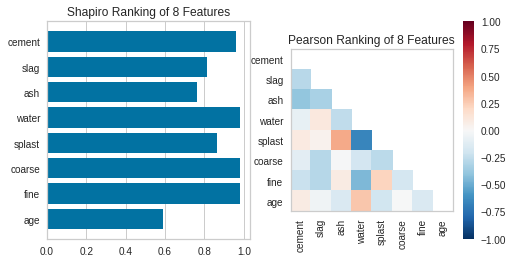

In [6]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import rank1d, rank2d

# Load the concrete dataset
X, _ = load_concrete()

_, axes = plt.subplots(ncols=2, figsize=(8,4))

rank1d(X, ax=axes[0], show=False)
rank2d(X, ax=axes[1], show=False)
plt.show()

### Task 5: Feature Analysis - Manifold Visualization

#### Discrete Target

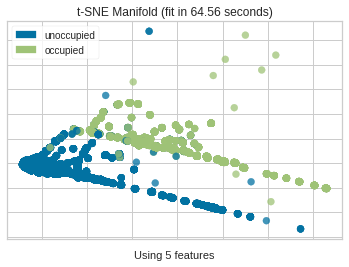

In [7]:
from yellowbrick.features import Manifold
from yellowbrick.datasets import load_occupancy

# Load the classification dataset
X, y = load_occupancy()
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
viz = Manifold(manifold="tsne", classes=classes)

viz.fit_transform(X, y)  # Fit the data to the visualizer
viz.show()               # Finalize and render the figure
plt.show()

#### Continuous

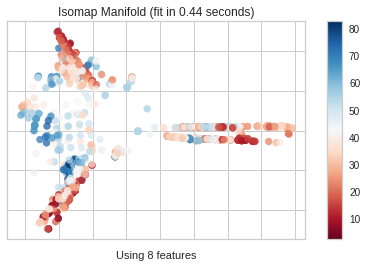

In [8]:
from yellowbrick.features import Manifold
from yellowbrick.datasets import load_concrete

# Load the regression dataset
X, y = load_concrete()

# Instantiate the visualizer
viz = Manifold(manifold="isomap", n_neighbors=10)

viz.fit_transform(X, y)  # Fit the data to the visualizer
viz.show()   
plt.show()

### Task 6: Principal Component Analysis

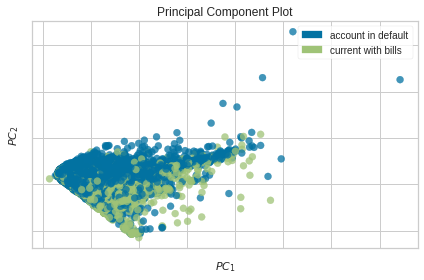

In [9]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA

# Specify the features of interest and the target
X, y = load_credit()
classes = ['account in default', 'current with bills']

visualizer = PCA(scale=True, classes=classes)
visualizer.fit_transform(X, y)
visualizer.show()
plt.show()

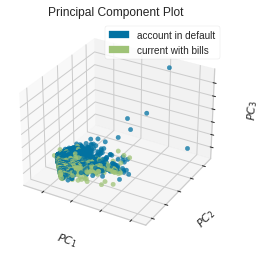

In [10]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA

X, y = load_credit()
classes = ['account in default', 'current with bills']

visualizer = PCA(
    scale=True, projection=3, classes=classes
)
visualizer.fit_transform(X, y)
visualizer.show()
plt.show()

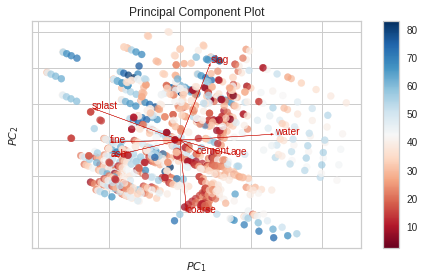

In [11]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import PCA

# Load the concrete dataset
X, y = load_concrete()

visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(X, y)
visualizer.show()
plt.show()

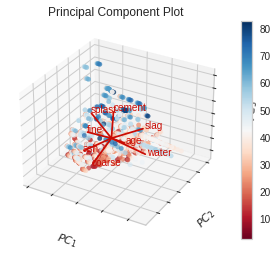

In [12]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import PCA

X, y = load_concrete()

visualizer = PCA(scale=True, proj_features=True, projection=3)
visualizer.fit_transform(X, y)
visualizer.show()
plt.show()

### Task 7: Balanced Binning 
#### (Binning continuous target of regression problem to transform to classification problem)

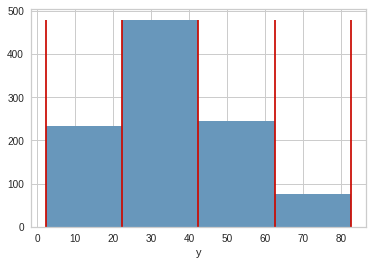

In [13]:
from yellowbrick.datasets import load_concrete
from yellowbrick.target import BalancedBinningReference

# Load the concrete dataset
X, y = load_concrete()

# Instantiate the visualizer
visualizer = BalancedBinningReference()

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()
plt.show()

### Task 8: Residual Plot

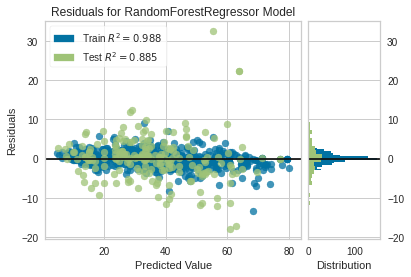

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts
from yellowbrick.regressor import residuals_plot
from yellowbrick.datasets import load_concrete

# Load the dataset and split into train/test splits
X, y = load_concrete()

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
residuals_plot(RandomForestRegressor(), X_train, y_train, X_test, y_test)
plt.show()

### Task 9: Prediction Error Plot

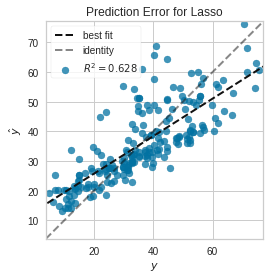

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import prediction_error

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
prediction_error(model, X_train, y_train, X_test, y_test)
plt.show()

### Task 10: Selecting alpha for L1 Regularization

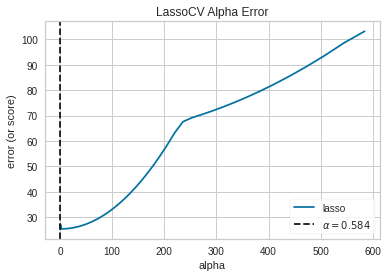

In [16]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor.alphas import alphas

from yellowbrick.datasets import load_energy

# Load dataset
X, y = load_energy()

# Use the quick method and immediately show the figure
model = LassoCV(random_state=0)
alphas(model, X, y)
plt.show()

### Task 11: Cook’s Distance
#### Cook’s Distance is a measure of an observation's influence on a linear regression. Instances with a large influence may be outliers and datasets that have a large number of highly influential points might not be good predictors to fit linear models. 

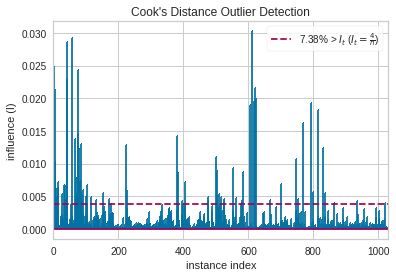

In [17]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import cooks_distance

# Load the regression dataset
X, y = load_concrete()

# Instantiate and fit the visualizer
cooks_distance(
    X, y,
    draw_threshold=True
)
plt.show()

### Task 12: Classification Report

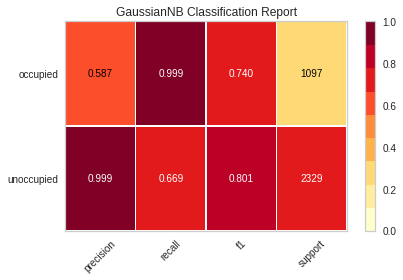

In [18]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB

from yellowbrick.datasets import load_occupancy
from yellowbrick.classifier import classification_report

# Load the classification data set
X, y = load_occupancy()

# Specify the target classes
classes = ["unoccupied", "occupied"]

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the visualizer
model = GaussianNB()
classification_report(
    model, 
    X_train, y_train, X_test, y_test, 
    classes = classes, 
    support = True
)
plt.show()

### Task 13: Precision-Recall Curves

#### Binary Classification

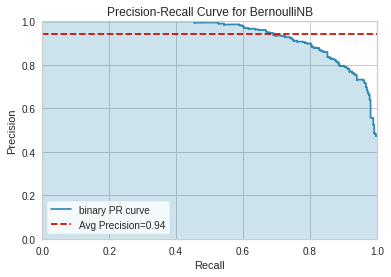

In [19]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.datasets import load_spam

X, y = load_spam()

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

model = BernoulliNB()
precision_recall_curve(
    model, 
    X_train, y_train, X_test, y_test
)
plt.show()

#### Multi Label Classification

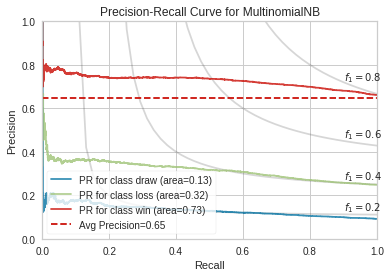

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.datasets import load_game

X, y = load_game()
X = OrdinalEncoder().fit_transform(X)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

model = MultinomialNB()
viz = PrecisionRecallCurve(
    model, 
    per_class=True, 
    iso_f1_curves=True,
    fill_area=False, 
    micro=False, 
    classes=encoder.classes_
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

### Task 14: Class Prediction Error

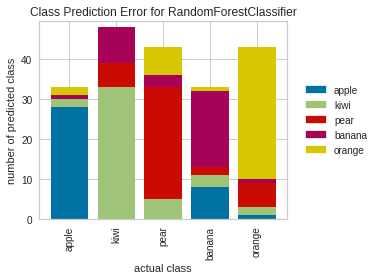

In [21]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError

X, y = make_classification(
    n_samples=1000, n_classes=5, n_informative=3, n_clusters_per_class=1,
    random_state=36,
)

classes = ["apple", "kiwi", "pear", "banana", "orange"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20,
    random_state=42
)

model = RandomForestClassifier(
    random_state=42, 
    n_estimators=10
)
visualizer = ClassPredictionError(
    model, 
    classes=classes
)

visualizer.fit(X_train, y_train)

visualizer.score(X_test, y_test)

visualizer.show()
plt.show()

### Task 15: Discrimination Threshold

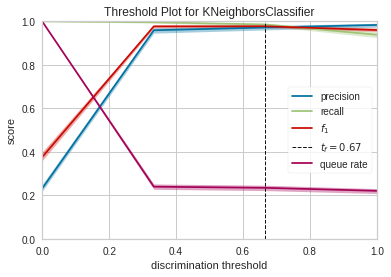

In [22]:
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.datasets import load_occupancy
from sklearn.neighbors import KNeighborsClassifier

#Load the classification dataset
X, y = load_occupancy()

# Instantiate the visualizer with the classification model
model = KNeighborsClassifier(3)

discrimination_threshold(model, X, y)
plt.show()

### Task 16: Elbow Method

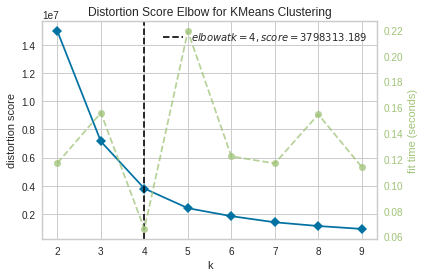

In [23]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl

X, y = load_nfl()

model = KMeans(random_state=4)
kelbow_visualizer(model, X, k=(2,10))
plt.show()

### Task 17: Silhouette Score

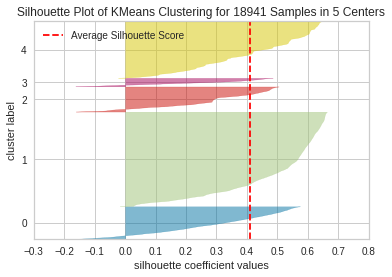

In [24]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.datasets import load_credit

# Load a clustering dataset
X, y = load_credit()

# Specify rows to cluster: under 40 y/o and have either graduate or university education
X = X[(X['age'] <= 40) & (X['edu'].isin([1,2]))]

# Use the quick method and immediately show the figure
model = KMeans(5, random_state=42)
silhouette_visualizer(
    model, 
    X, 
    colors='yellowbrick'
)
plt.show()

### Task 18: Intercluster Distance

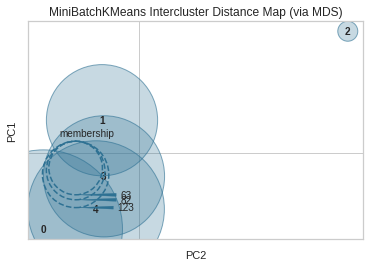

In [25]:
from yellowbrick.datasets import load_nfl
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import intercluster_distance


X, _ = load_nfl()
model = MiniBatchKMeans(5, random_state=777)
intercluster_distance(model, X)
plt.show()

### Task 19: Validation Score

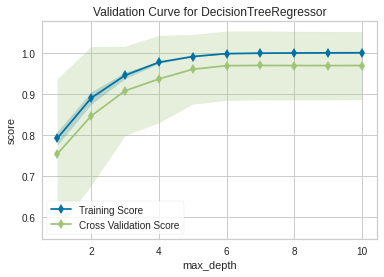

In [26]:
import numpy as np

from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import validation_curve

from sklearn.tree import DecisionTreeRegressor

# Load a regression dataset
X, y = load_energy()

model = DecisionTreeRegressor()
validation_curve(
    model, 
    X, y, 
    param_name="max_depth",
    param_range=np.arange(1, 11), 
    cv=10, 
    scoring="r2",
)
plt.show()

### Task 20: Learning Curve

#### Classification

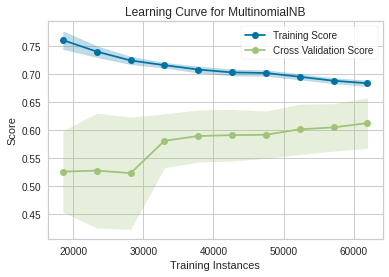

In [27]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from yellowbrick.datasets import load_game
from yellowbrick.model_selection import LearningCurve

# Load a classification dataset
X, y = load_game()

# Encode the categorical data
X = OneHotEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = LearningCurve(
    model, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure
plt.show()

#### Regression

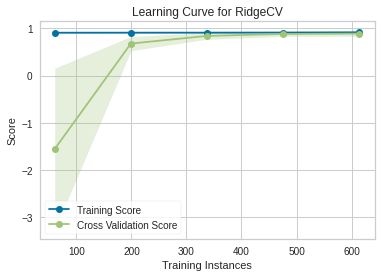

In [28]:
from sklearn.linear_model import RidgeCV

from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import LearningCurve

# Load a regression dataset
X, y = load_energy()

# Instantiate the regression model and visualizer
model = RidgeCV()
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure
plt.show()

#### Clustering

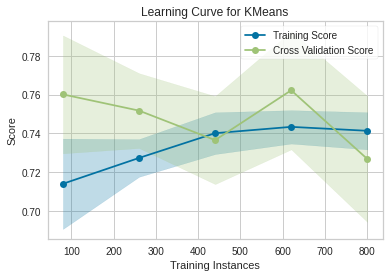

In [29]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.model_selection import LearningCurve

# Generate synthetic dataset with 5 random clusters
X, y = make_blobs(n_samples=1000, centers=5, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = LearningCurve(model, scoring="adjusted_rand_score", random_state=42)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure
plt.show()

### Task 21: Cross Validation Score

#### Classification

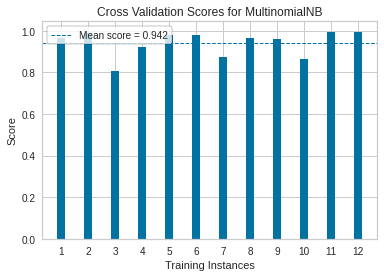

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import CVScores

# Load the classification dataset
X, y = load_occupancy()

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = CVScores(model, cv=cv, scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure
plt.show()

#### Regression

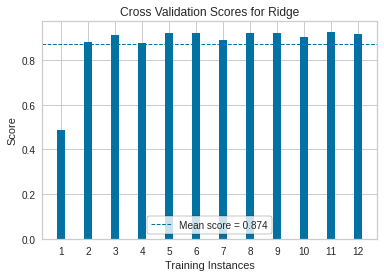

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import CVScores

# Load the regression dataset
X, y = load_energy()

# Instantiate the regression model and visualizer
cv = KFold(n_splits=12, random_state=42)

model = Ridge()
visualizer = CVScores(model, cv=cv, scoring='r2')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure
plt.show()

### Task 22: Feature Importance

#### Regression / Binary Classification

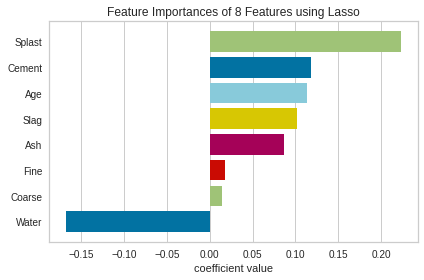

In [32]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset
dataset = load_concrete(return_dataset=True)
X, y = dataset.to_data()

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), dataset.meta['features']))

model = Lasso()
viz = FeatureImportances(
    model, 
    labels=labels, 
    relative=False
)

viz.fit(X, y)
viz.show()
plt.show()

#### Multilabel Classification

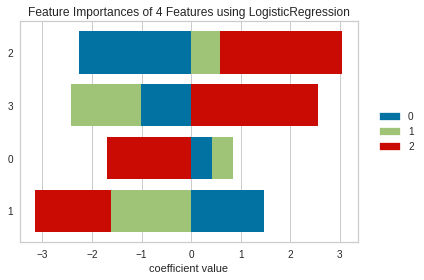

In [33]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data, data.target

model = LogisticRegression(multi_class="auto", solver="liblinear")
viz = FeatureImportances(model, stack=True, relative=False)
viz.fit(X, y)
viz.show()
plt.show()

### Task 23: Recursive Feature Elimination

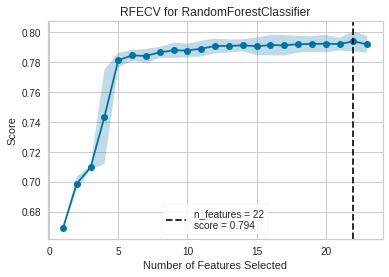

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import rfecv
from yellowbrick.datasets import load_credit

X, y = load_credit()

cv = StratifiedKFold(2)
model = RandomForestClassifier()
rfecv(
    model, 
    X=X, y=y, 
    cv=cv, 
    scoring='f1_weighted'
)
plt.show()

### Task 24: Token Frequency Distribution

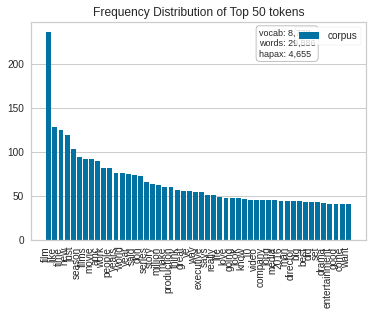

In [35]:
from collections import defaultdict

from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import freqdist
from yellowbrick.datasets import load_hobbies

# Load the text data
corpus = load_hobbies()

# Create a dict to map target labels to documents of that category
hobbies = defaultdict(list)
for text, label in zip(corpus.data, corpus.target):
    hobbies[label].append(text)

vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(text for text in hobbies['cinema'])
features   = vectorizer.get_feature_names()

freqdist(features, docs, orient='v')
plt.show()

### Task 25: t-SNE Corpus Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

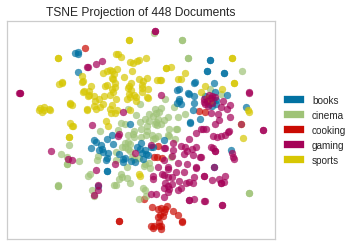

In [36]:
from yellowbrick.text.tsne import tsne
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.datasets import load_hobbies

corpus = load_hobbies()
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(corpus.data)
y = corpus.target

tsne(X, y)
plt.show()

### Task 26: Uniform Manifold Approximation and Projection (UMAP) Corpus Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

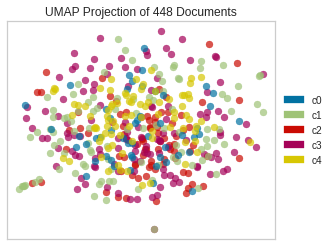

In [37]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import umap
from yellowbrick.datasets import load_hobbies

# Load the text data
corpus = load_hobbies()

tfidf = TfidfVectorizer()
docs = tfidf.fit_transform(corpus.data)

# Instantiate the clustering model
clusters = KMeans(n_clusters=5)
clusters.fit(docs)

umap(docs, ["c{}".format(c) for c in clusters.labels_])
plt.show()

### Task 27: Dispersion Plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


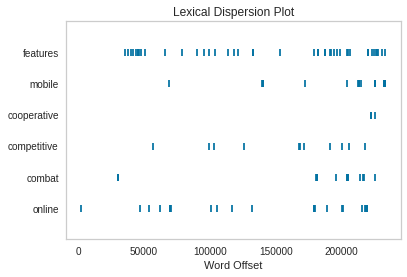

In [38]:
from yellowbrick.text import DispersionPlot, dispersion
from yellowbrick.datasets import load_hobbies

# Load the text data
corpus = load_hobbies()

# Create a list of words from the corpus text
text = [doc.split() for doc in corpus.data]

# Choose words whose occurence in the text will be plotted
target_words = ['features', 'mobile', 'cooperative', 'competitive', 'combat', 'online']

# Create the visualizer and draw the plot
dispersion(target_words, text)
plt.show()

### Task 28: PosTag Visualization

#### Penn Treebank Tags

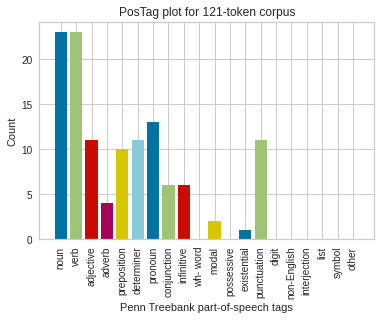

In [39]:
from yellowbrick.text import PosTagVisualizer


tagged_stanzas = [
    [
        [
            ('Whose', 'JJ'),('woods', 'NNS'),('these', 'DT'),
            ('are', 'VBP'),('I', 'PRP'),('think', 'VBP'),('I', 'PRP'),
            ('know', 'VBP'),('.', '.')
            ],
        [
            ('His', 'PRP$'),('house', 'NN'),('is', 'VBZ'),('in', 'IN'),
            ('the', 'DT'),('village', 'NN'),('though', 'IN'),(';', ':'),
            ('He', 'PRP'),('will', 'MD'),('not', 'RB'),('see', 'VB'),
            ('me', 'PRP'),('stopping', 'VBG'), ('here', 'RB'),('To', 'TO'),
            ('watch', 'VB'),('his', 'PRP$'),('woods', 'NNS'),('fill', 'VB'),
            ('up', 'RP'),('with', 'IN'),('snow', 'NNS'),('.', '.')
            ]
        ],
    [
        [
            ('My', 'PRP$'),('little', 'JJ'),('horse', 'NN'),('must', 'MD'),
            ('think', 'VB'),('it', 'PRP'),('queer', 'JJR'),('To', 'TO'),
            ('stop', 'VB'),('without', 'IN'),('a', 'DT'),('farmhouse', 'NN'),
            ('near', 'IN'),('Between', 'NNP'),('the', 'DT'),('woods', 'NNS'),
            ('and', 'CC'),('frozen', 'JJ'),('lake', 'VB'),('The', 'DT'),
            ('darkest', 'JJS'),('evening', 'NN'),('of', 'IN'),('the', 'DT'),
            ('year', 'NN'),('.', '.')
            ]
        ],
    [
        [
            ('He', 'PRP'),('gives', 'VBZ'),('his', 'PRP$'),('harness', 'NN'),
            ('bells', 'VBZ'),('a', 'DT'),('shake', 'NN'),('To', 'TO'),
            ('ask', 'VB'),('if', 'IN'),('there', 'EX'),('is', 'VBZ'),
            ('some', 'DT'),('mistake', 'NN'),('.', '.')
            ],
        [
            ('The', 'DT'),('only', 'JJ'),('other', 'JJ'),('sound', 'NN'),
            ('’', 'NNP'),('s', 'VBZ'),('the', 'DT'),('sweep', 'NN'),
            ('Of', 'IN'),('easy', 'JJ'),('wind', 'NN'),('and', 'CC'),
            ('downy', 'JJ'),('flake', 'NN'),('.', '.')
            ]
        ],
    [
        [
            ('The', 'DT'),('woods', 'NNS'),('are', 'VBP'),('lovely', 'RB'),
            (',', ','),('dark', 'JJ'),('and', 'CC'),('deep', 'JJ'),(',', ','),
            ('But', 'CC'),('I', 'PRP'),('have', 'VBP'),('promises', 'NNS'),
            ('to', 'TO'),('keep', 'VB'),(',', ','),('And', 'CC'),('miles', 'NNS'),
            ('to', 'TO'),('go', 'VB'),('before', 'IN'),('I', 'PRP'),
            ('sleep', 'VBP'),(',', ','),('And', 'CC'),('miles', 'NNS'),
            ('to', 'TO'),('go', 'VB'),('before', 'IN'),('I', 'PRP'),
            ('sleep', 'VBP'),('.', '.')
            ]
    ]
]

# Create the visualizer, fit, score, and show it
viz = PosTagVisualizer()
viz.fit(tagged_stanzas)
viz.show()
plt.show()

#### Universal Dependencies Tags

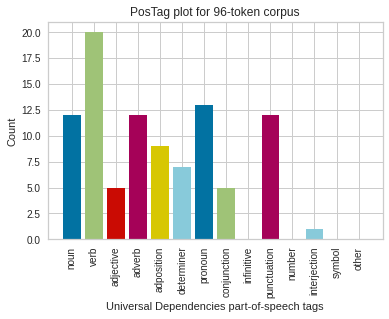

In [40]:
from yellowbrick.text import PosTagVisualizer

tagged_speech = [
    [
        [
            ('In', 'ADP'),('all', 'DET'),('honesty', 'NOUN'),(',', 'PUNCT'),
            ('I', 'PRON'),('said', 'VERB'),('yes', 'INTJ'),('to', 'ADP'),
            ('the', 'DET'),('fear', 'NOUN'),('of', 'ADP'),('being', 'VERB'),
            ('on', 'ADP'),('this', 'DET'),('stage', 'NOUN'),('tonight', 'NOUN'),
            ('because', 'ADP'),('I', 'PRON'),('wanted', 'VERB'),('to', 'PART'),
            ('be', 'VERB'),('here', 'ADV'),(',', 'PUNCT'),('to', 'PART'),
            ('look', 'VERB'),('out', 'PART'),('into', 'ADP'),('this', 'DET'),
            ('audience', 'NOUN'),(',', 'PUNCT'),('and', 'CCONJ'),
            ('witness', 'VERB'),('this', 'DET'),('moment', 'NOUN'),('of', 'ADP'),
            ('change', 'NOUN')
            ],
        [
            ('and', 'CCONJ'),('I', 'PRON'),("'m", 'VERB'),('not', 'ADV'),
            ('fooling', 'VERB'),('myself', 'PRON'),('.', 'PUNCT')
            ],
        [
            ('I', 'PRON'),("'m", 'VERB'),('not', 'ADV'),('fooling', 'VERB'),
            ('myself', 'PRON'),('.', 'PUNCT')
            ],
        [
            ('Next', 'ADJ'),('year', 'NOUN'),('could', 'VERB'),('be', 'VERB'),
            ('different', 'ADJ'),('.', 'PUNCT')
            ],
        [
            ('It', 'PRON'),('probably', 'ADV'),('will', 'VERB'),('be', 'VERB'),
            (',', 'PUNCT'),('but', 'CCONJ'),('right', 'ADV'),('now', 'ADV'),
            ('this', 'DET'),('moment', 'NOUN'),('is', 'VERB'),('real', 'ADJ'),
            ('.', 'PUNCT')
            ],
        [
            ('Trust', 'VERB'),('me', 'PRON'),(',', 'PUNCT'),('it', 'PRON'),
            ('is', 'VERB'),('real', 'ADJ'),('because', 'ADP'),('I', 'PRON'),
            ('see', 'VERB'),('you', 'PRON')
            ],
        [
            ('and', 'CCONJ'), ('I', 'PRON'), ('see', 'VERB'), ('you', 'PRON')
            ],
        [
            ('—', 'PUNCT')
            ],
        [
            ('all', 'ADJ'),('these', 'DET'),('faces', 'NOUN'),('of', 'ADP'),
            ('change', 'NOUN')
            ],
        [
            ('—', 'PUNCT'),('and', 'CCONJ'),('now', 'ADV'),('so', 'ADV'),
            ('will', 'VERB'),('everyone', 'NOUN'),('else', 'ADV'), ('.', 'PUNCT')
            ]
    ]
]

# Create the visualizer, fit, score, and show it
viz = PosTagVisualizer(tagset="universal")
viz.fit(tagged_speech)
viz.show()
plt.show()

### Task 29: Decision Boundary Visualization

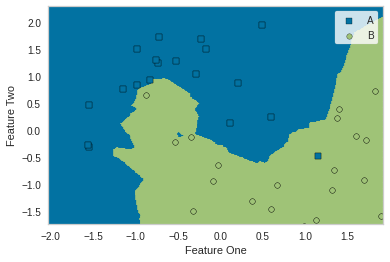

In [41]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.contrib.classifier import DecisionViz

data_set = make_moons(noise=0.3, random_state=0)

X, y = data_set
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = tts(X, y, test_size=.4, random_state=42)

viz = DecisionViz(
    KNeighborsClassifier(3), title="Nearest Neighbors",
    features=['Feature One', 'Feature Two'], classes=['A', 'B']
)
viz.fit(X_train, y_train)
viz.draw(X_test, y_test)
viz.show()
plt.show()

### Task 30: Bar Plots for Missing Values

#### Without Labels

No handles with labels found to put in legend.


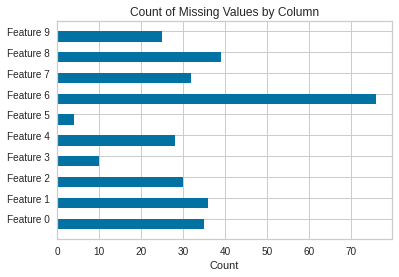

In [42]:
import numpy as np

from sklearn.datasets import make_classification
from yellowbrick.contrib.missing import MissingValuesBar

# Make a classification dataset
X, y = make_classification(
    n_samples=400, n_features=10, n_informative=2, n_redundant=3,
    n_classes=2, n_clusters_per_class=2, random_state=854
)

# Assign NaN values
X[X > 1.5] = np.nan
features = ["Feature {}".format(str(n)) for n in range(10)]

# Instantiate the visualizer
visualizer = MissingValuesBar(features=features)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
plt.show()

#### With labels

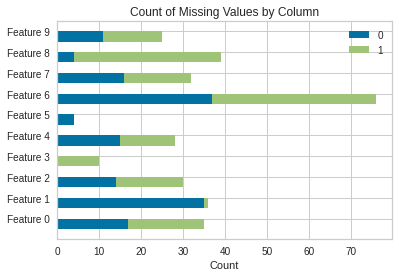

In [43]:
import numpy as np

from sklearn.datasets import make_classification
from yellowbrick.contrib.missing import MissingValuesBar

# Make a classification dataset
X, y = make_classification(
    n_samples=400, n_features=10, n_informative=2, n_redundant=3,
    n_classes=2, n_clusters_per_class=2, random_state=854
)

# Assign NaN values
X[X > 1.5] = np.nan
features = ["Feature {}".format(str(n)) for n in range(10)]

# Instantiate the visualizer
visualizer = MissingValuesBar(features=features)

visualizer.fit(X, y=y)        # Supply the targets via y
visualizer.show()             # Finalize and render the figure
plt.show()

### Task 31: Dispersion Plots for Missing Values

#### Without Labels

No handles with labels found to put in legend.


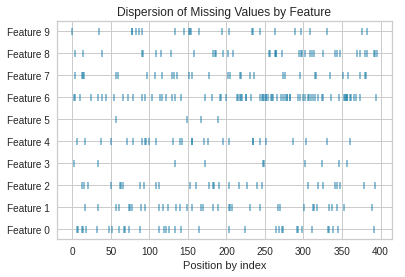

In [44]:
import numpy as np

from sklearn.datasets import make_classification
from yellowbrick.contrib.missing import MissingValuesDispersion

X, y = make_classification(
    n_samples=400, 
    n_features=10, 
    n_informative=2, 
    n_redundant=3,
    n_classes=2, 
    n_clusters_per_class=2, 
    random_state=854
)

# assign some NaN values
X[X > 1.5] = np.nan
features = ["Feature {}".format(str(n)) for n in range(10)]

visualizer = MissingValuesDispersion(features=features)

visualizer.fit(X)
visualizer.show()
plt.show()

#### With labels

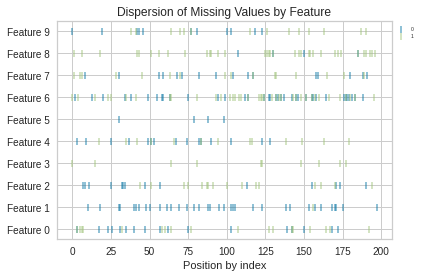

In [45]:
import numpy as np

from sklearn.datasets import make_classification
from yellowbrick.contrib.missing import MissingValuesDispersion

X, y = make_classification(
    n_samples=400, 
    n_features=10, 
    n_informative=2, 
    n_redundant=3,
    n_classes=2, 
    n_clusters_per_class=2, 
    random_state=854
)

# assign some NaN values
X[X > 1.5] = np.nan
features = ["Feature {}".format(str(n)) for n in range(10)]

# Instantiate the visualizer
visualizer = MissingValuesDispersion(features=features)

visualizer.fit(X, y=y) # supply the targets via y
visualizer.show()
plt.show()